In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
source = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-27/olympics.csv')
source

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [3]:
source.describe() #contain a lot of missing values in height and weight

,id,age,height,weight,year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [9]:
chn = source[(source['noc'] == 'CHN')]
chn_m = chn[chn['medal'].notnull()]
chn_m #dataframe of all Chinese atheletes who won a medal

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
6433,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,Silver
6435,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres R...",Bronze
6436,3610,An Yulong,M,23.0,173.0,70.0,China,CHN,2002 Winter,2002,Winter,Salt Lake City,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres R...",Bronze
6437,3611,An Zhongxin,F,23.0,170.0,65.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Softball,Softball Women's Softball,Silver
11690,6381,Ba Yan,F,21.0,183.0,78.0,China,CHN,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Women's Basketball,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270435,135269,Zou Kai,M,24.0,158.0,55.0,China,CHN,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Floor Exercise,Gold
270436,135269,Zou Kai,M,24.0,158.0,55.0,China,CHN,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Horizontal Bar,Bronze
270438,135270,Zou Shiming,M,23.0,165.0,49.0,China,CHN,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Light-Flyweight,Bronze
270439,135270,Zou Shiming,M,27.0,165.0,49.0,China,CHN,2008 Summer,2008,Summer,Beijing,Boxing,Boxing Men's Light-Flyweight,Gold


In [10]:
chn_m.describe(include='all')

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
count,989.000000,989,989,989.000000,985.000000,987.000000,989,989,989,989.000000,989,989,989,989,989
unique,NaN,653,2,NaN,NaN,NaN,4,1,16,NaN,2,16,36,181,3
top,NaN,Yang Yang,F,NaN,NaN,NaN,China,CHN,2008 Summer,NaN,Summer,Beijing,Gymnastics,Volleyball Women's Volleyball,Gold
freq,NaN,10,654,NaN,NaN,NaN,901,989,184,NaN,909,184,109,66,350
mean,89409.031345,NaN,NaN,23.203236,170.300508,63.903749,NaN,NaN,NaN,2002.695652,NaN,NaN,NaN,NaN,NaN
std,40893.812327,NaN,NaN,4.013155,10.320625,13.298544,NaN,NaN,NaN,9.625444,NaN,NaN,NaN,NaN,NaN
min,3610.000000,NaN,NaN,13.000000,136.000000,28.000000,NaN,NaN,NaN,1984.000000,NaN,NaN,NaN,NaN,NaN
25%,51108.000000,NaN,NaN,20.000000,164.000000,55.500000,NaN,NaN,NaN,1996.000000,NaN,NaN,NaN,NaN,NaN
50%,91038.000000,NaN,NaN,23.000000,170.000000,63.000000,NaN,NaN,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN
75%,132016.000000,NaN,NaN,26.000000,177.000000,71.000000,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN


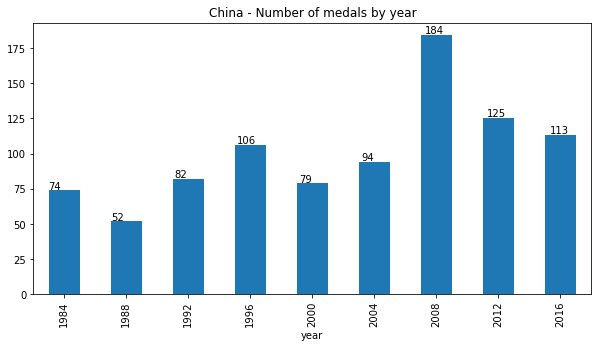

In [88]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = chn_m[chn_m['season']=='Summer'].groupby(['year']).count()['id'].plot(kind='bar', title='China - Number of medals by year')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

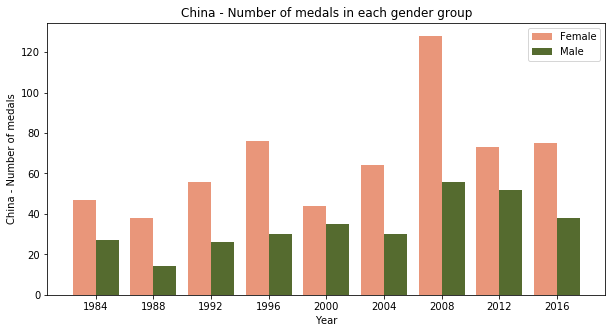

In [89]:
X = np.arange(1984, 2017, 4)
F_m = chn_m[(chn_m['season']=='Summer') & (chn_m['sex']=='F')].groupby(['year']).count()['id']
M_m = chn_m[(chn_m['season']=='Summer') & (chn_m['sex']=='M')].groupby(['year']).count()['id']
  
X_axis = np.arange(len(X))
width = 0.4

plt.figure(figsize = (10,5))
plt.bar(X_axis - 0.2, F_m, width, label = 'Female', color='darksalmon')
plt.bar(X_axis + 0.2, M_m, width, label = 'Male', color='darkolivegreen')
  
plt.xticks(X_axis, X)
plt.xlabel("Year")
plt.ylabel("China - Number of medals")
plt.title("China - Number of medals in each gender group")
plt.legend()
plt.show()

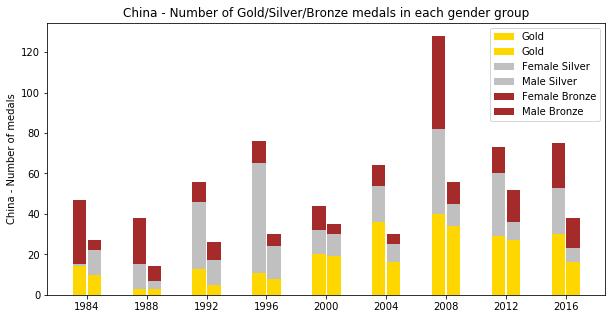

In [90]:
X = np.arange(1984, 2017, 4)
F_g = list(chn_m[(chn_m['season']=='Summer') & (chn_m['sex']=='F') & (chn_m['medal']=='Gold')].groupby(['year']).count()['id'])
M_g = list(chn_m[(chn_m['season']=='Summer') & (chn_m['sex']=='M') & (chn_m['medal']=='Gold')].groupby(['year']).count()['id'])
F_s = list(chn_m[(chn_m['season']=='Summer') & (chn_m['sex']=='F') & (chn_m['medal']=='Silver')].groupby(['year']).count()['id'])
M_s = list(chn_m[(chn_m['season']=='Summer') & (chn_m['sex']=='M') & (chn_m['medal']=='Silver')].groupby(['year']).count()['id'])
F_b = list(chn_m[(chn_m['season']=='Summer') & (chn_m['sex']=='F') & (chn_m['medal']=='Bronze')].groupby(['year']).count()['id'])
M_b = list(chn_m[(chn_m['season']=='Summer') & (chn_m['sex']=='M') & (chn_m['medal']=='Bronze')].groupby(['year']).count()['id'])

fig,ax = plt.subplots(figsize=(10,5))
X_axis = np.arange(len(X))

ax.bar(X - 0.5, F_g, 0.9, label = 'Gold', color='gold')
ax.bar(X + 0.5, M_g, 0.9, label = 'Gold', color='gold')
ax.bar(X - 0.5, F_s, 0.9, bottom = F_g, label = 'Female Silver', color='silver')
ax.bar(X + 0.5, M_s, 0.9, bottom = M_g, label = 'Male Silver', color='silver')
ax.bar(X - 0.5, F_b, 0.9, bottom = np.array(F_g)+np.array(F_s), label = 'Female Bronze', color='brown')
ax.bar(X + 0.5, M_b, 0.9, bottom = np.array(M_g)+np.array(M_s), label = 'Male Bronze', color='brown')

ax.set_xticks(X)
#ax.xaxis.set_tick_params(rotation=90)
#ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('China - Number of medals')
ax.set_title('China - Number of Gold/Silver/Bronze medals in each gender group')
ax.legend()

plt.show()



female won more medals than male in every Olympic games from 1984 - 2016
let's see the number of participants in each gender group
in order to discuss whether this difference is because we have more female athletes than male

In [91]:
#create a df of all Chinese athletes participating in Summer Olympics from 1984 to 2016
chn_a = chn[(chn['season']=='Summer') & (chn['year']>=1984) & (chn['year']<=2016)]

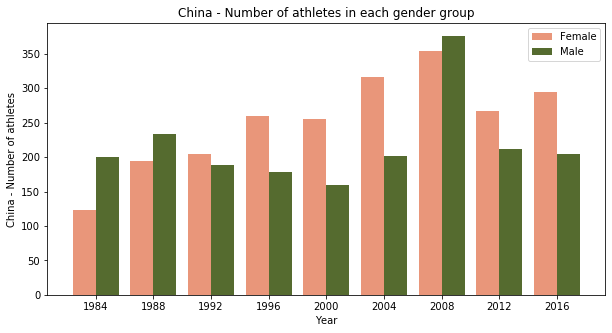

In [94]:
#show number of atheletes by gender
#we use count instead of nunique as one athlete can participate in multiple games
#the ratio we are interested is how many medals won / how many participants

#let's use the same x axis as above
F_a = chn_a[chn_a['sex']=='F'].groupby(['year']).count()['id']
M_a = chn_a[chn_a['sex']=='M'].groupby(['year']).count()['id']

plt.figure(figsize = (10,5))
plt.bar(X_axis - 0.2, F_a, 0.4, label = 'Female', color='darksalmon')
plt.bar(X_axis + 0.2, M_a, 0.4, label = 'Male', color='darkolivegreen')
  
plt.xticks(X_axis, X)
plt.xlabel("Year")
plt.ylabel("China - Number of athletes")
plt.title("China - Number of athletes in each gender group")
plt.legend()
plt.show()

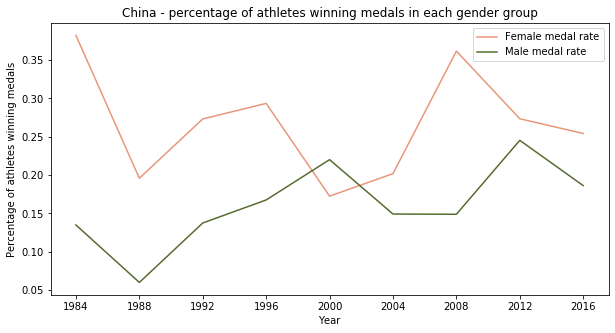

In [93]:
#create a new metric: medal rate = number of medals / number of athletes
F_r = list(F_m / F_a)
M_r = list(M_m / M_a)

plt.figure(figsize=(10,5))
plt.plot(X_axis, F_r, label = "Female medal rate", color='darksalmon')
plt.plot(X_axis, M_r, label = "Male medal rate", color='darkolivegreen')

plt.xticks(X_axis, X)
plt.xlabel('Year')
plt.ylabel('Percentage of athletes winning medals')
plt.title('China - percentage of athletes winning medals in each gender group')
plt.legend()
plt.show()
